<a href="https://colab.research.google.com/github/sunn-123/Food_project/blob/main/Cnn_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.A3QT67_2.0.0/food101-train.tfrecord*...:   0%|         …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.A3QT67_2.0.0/food101-validation.tfrecord*...:   0%|    …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.
Toatl Classes: 101
Class Names: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup

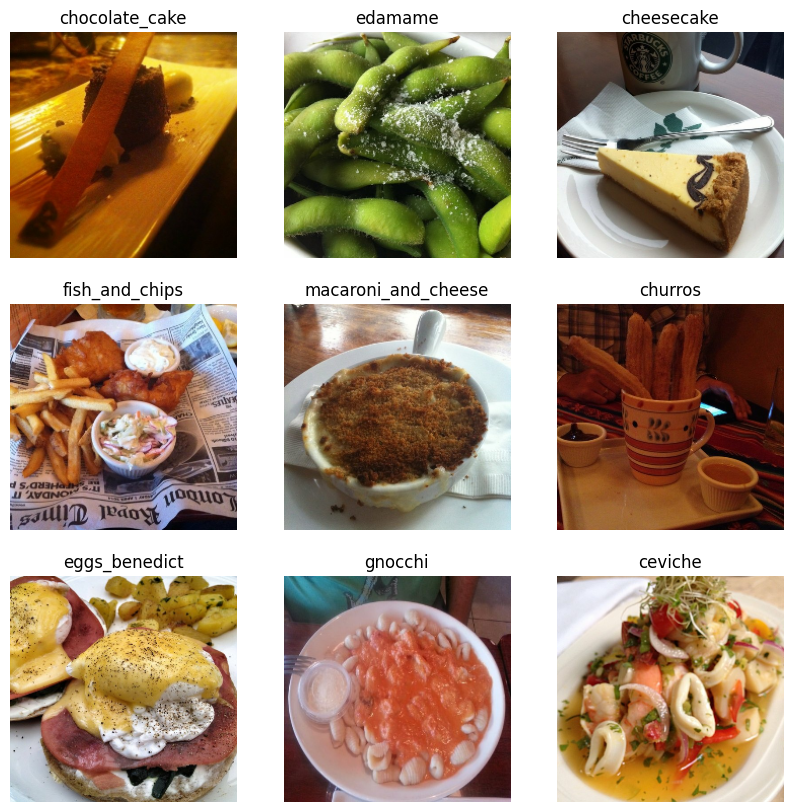

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 4549s 2s/step - accuracy: 0.3820 - loss: 2.6175 - val_accuracy: 0.5729 - val_loss: 1.6341


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np


(ds_train, ds_test), ds_info = tfds.load(
    'food101',
    split=['train', 'validation'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

print("Toatl Classes:", ds_info.features['label'].num_classes)
print("Class Names:", ds_info.features['label'].names)

IMG_SIZE = 224
BATCH_SIZE = 32

def Preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32)/ 255.0
    return image, label

ds_train = ds_train.map(Preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(Preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

for images, labels in ds_train.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        label = ds_info.features["label"].int2str(labels[i].numpy())
        plt.title(label)
        plt.axis("off")
    plt.show()


base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(101, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(ds_train, epochs=1, validation_data=ds_test)

In [ ]:
history = model.fit(ds_train, epochs=1, validation_data=ds_test)

2368/2368 ━━━━━━━━━━━━━━━━━━━━ 4574s 2s/step - accuracy: 0.6196 - loss: 1.4809 - val_accuracy: 0.5991 - val_loss: 1.5481


790/790 ━━━━━━━━━━━━━━━━━━━━ 1168s 1s/step - accuracy: 0.5991 - loss: 1.5490
Test Accuracy: 59.91%
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


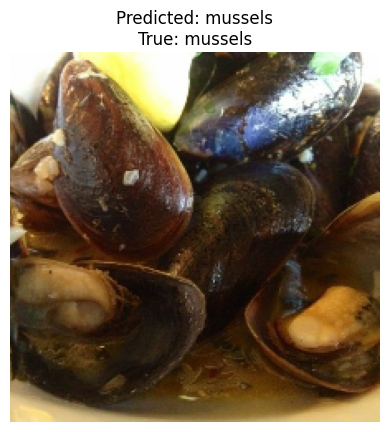

In [ ]:
#STEP 10: Evaluate the Model
loss, accuracy = model.evaluate(ds_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

#STEP 11: Make Predictions & Show Results
class_names = ds_info.features['label'].names

for images, labels in ds_test.take(1):
    image = images[0]
    true_label = class_names[labels[0].numpy()]

    prediction = model.predict(tf.expand_dims(image, axis=0))
    predicted_label = class_names[np.argmax(prediction)]

    plt.imshow(image)
    plt.title(f"Predicted: {predicted_label}\nTrue: {true_label}")
    plt.axis('off')
    plt.show()

#STEP 12: Save the Trained Model (Optional)
model.save("food101_model.h5")  # Save to file
#Saves the trained model in .h5 format so you can reuse it later.+